<a href="https://colab.research.google.com/github/ShuvamAich/Machine-Learning/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Spark Foundation**


# **Data Science and Business Analytics Internship**


Task 2: Prediction using Unsupervised ML (To predict optimum number of clusters and represent it visually)




**Author: Shuvam Aich**

In [41]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [42]:
#importing the dataset
df = pd.read_csv('/content/Iris.csv')

In [43]:
df = df.drop(columns = ['Id'])
df.head() #view the content

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
df.shape

(150, 5)

In [45]:
# to display no. of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

## Data Preprocessing

We need to check for null values. In case there is a null value, we need to replace it with either the mean, meadian or mode of the data.

In [46]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

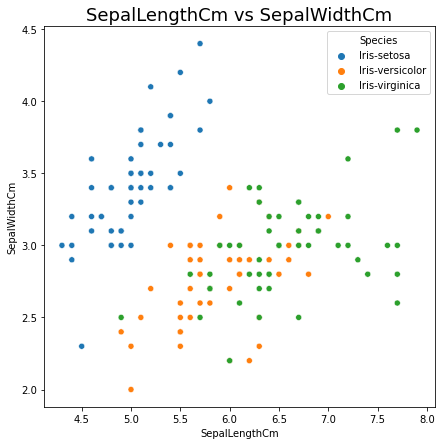

In [47]:
# Data visualization between SepalLengthCm and SepalWidthCm
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = df)
plt.title('SepalLengthCm vs SepalWidthCm', fontsize = 18)
plt.show()


# Finding Optimal Number of Clusters using **The Elbow Method**

In [48]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

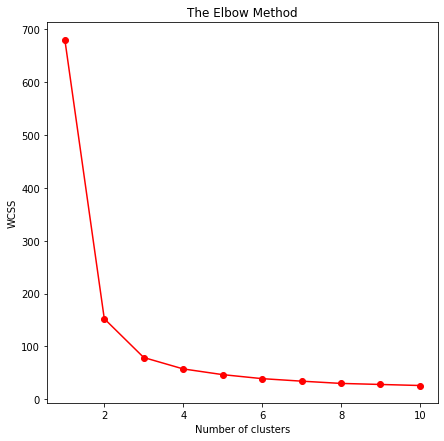

In [49]:
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
fig = plt.figure(figsize=(7, 7))
plt.plot(range(1, 11), wcss, 'ro-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

We choose the number of clusters as **3**

In [50]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Plotting the Final Graph

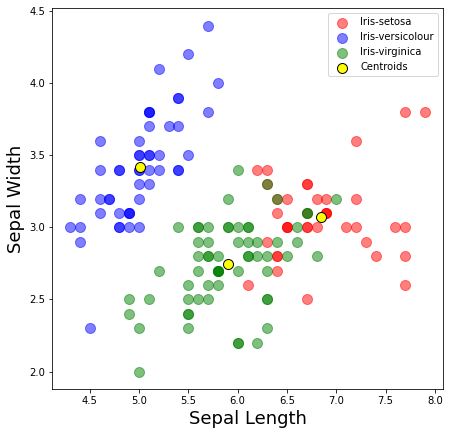

In [51]:
# Visualising the clusters - On the first two columns

fig = plt.figure(figsize=(7, 7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa', alpha=0.5)
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour',alpha=0.5)
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica',alpha=0.5)

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids', edgecolor='k')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

plt.legend()

**Note:  This model can further be improved by:**

*   Calculating the distance from centroids
*   Updating the centroids
*   Again reassign the points with clusters
*   Continue until all assigned clusters don't change anymore
*   Obtain the final result

